In [82]:
import numpy as np 
import matplotlib.pyplot as plt 
from n_arm_bandit import NArmedBandit
from agent import BanditAgent
from environment import BanditEnvironment
import matplotlib.pyplot as plt

In [83]:
history = np.load("./history.npy")
rewards = np.load("./rewards.npy")
actions = np.load("./actions.npy")
mean_deviations = np.load("./mean_deviation_pairs.npy")
value_table = np.load("./value_table.npy")
greedy = np.load("./greedy.npy")

domain = np.arange(0, 50000, 1)

# Training 

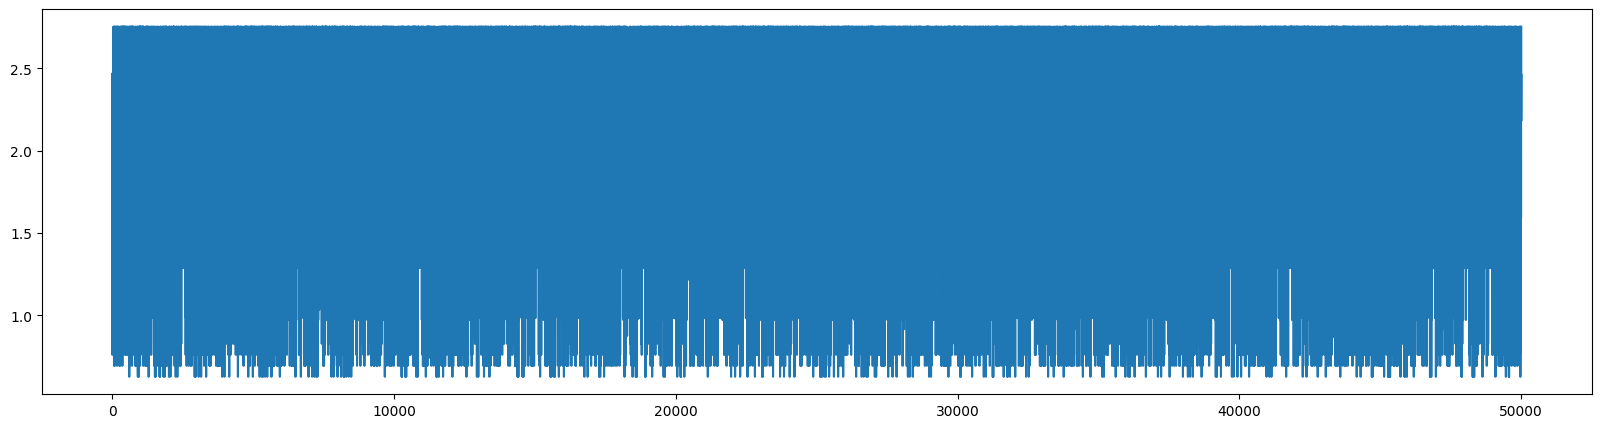

In [96]:
plt.figure(figsize=(20, 5))
plt.plot(domain, history)

In [97]:
reward_types, reward_type_counts = np.unique(history, return_counts=True)

<BarContainer object of 95 artists>

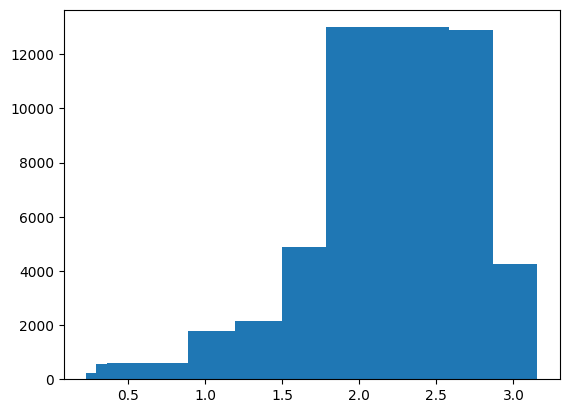

In [98]:
plt.bar(reward_types, reward_type_counts)

# Actions

In [85]:
actions

array([0, 0, 2, ..., 0, 0, 0], dtype=int64)

In [86]:
action_types, counts = np.unique(actions, return_counts=True) 

<BarContainer object of 10 artists>

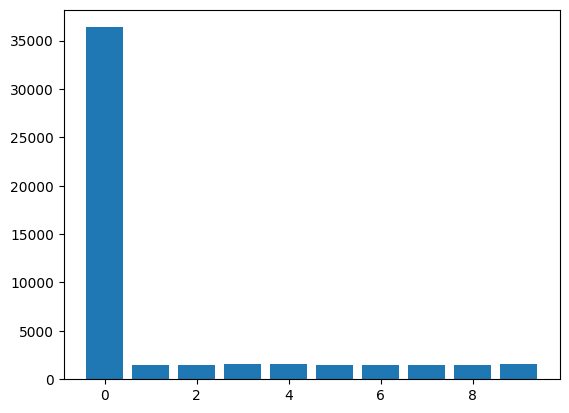

In [87]:
plt.bar(action_types, counts)

# Rewards

In [88]:
rewards

array([0.32789137, 0.63199525, 0.91764055, 0.56150814, 0.69483321,
       0.84140391, 0.32399727, 0.27568919, 0.20904839, 0.37906853])

# Value table

In [89]:
value_table

array([2.2901168, 2.1618311, 1.5666822, 0.7278063, 1.4365807, 1.7376976,
       1.4865845, 1.7560786, 2.321172 , 1.444342 ], dtype=float32)

In [90]:
mean_deviations

array([[2.        , 0.47262241],
       [5.        , 0.70505532],
       [1.        , 0.90992258],
       [8.        , 0.35245585],
       [1.        , 0.1806925 ],
       [6.        , 0.03627423],
       [1.        , 0.61095603],
       [6.        , 0.03442301],
       [2.        , 0.25396919],
       [1.        , 0.32843019]])

# Greedy 

In [91]:
greedy

array([1, 1, 0, ..., 1, 1, 1])

# Test reward and distribution

In [92]:
true_reward = np.zeros(10) 

for symbol, (mean, deviation) in enumerate(mean_deviations): 
    for i in range(1000): 
        random_numbers = np.random.normal(
            loc=mean, scale=deviation, size=3)
        random_indices = [np.abs(int(np.floor(num % 10)))
                          for num in random_numbers]

        for random_index in random_indices: 
            true_reward[symbol] += rewards[random_index]
        

In [94]:
true_reward = true_reward / 1000

In [95]:
true_reward

array([2.29290336, 2.14587311, 1.54382301, 0.72661907, 1.44408737,
       1.77086766, 1.49872927, 1.74499733, 2.31358072, 1.44144859])